The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.
<br>Link: https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd?resource=download&select=housing.csv<br>Significado das colunas:
<ul>
<li>RM - average number of rooms per dwelling (Número médio de cômodos por moradia)</li>
<li>LSTAT - % lower status of the population (% Menor Status)</li>
<li>PTRATIO - pupil-teacher ratio by town (Relação aluno-professor por cidade)</li>
<li>MEDV - Median value of owner-occupied homes in $1000's (Valor mediano das casas ocupadas em $1000)</li>
</ul>


In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [2]:
# Importando o dataset housing e visualizando os 5 primeiros registros
houses = pd.read_csv('housing.csv')
houses.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
# número de linhas e colunas
houses.shape

(489, 4)

In [4]:
# tipos de dados
houses.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [5]:
# Resumo estatístico dos dados
houses.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
# Verificando se há valores ausentes e quantos 
houses.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [7]:
# Verificando a correlação entre as variáveis
houses.corr(method='pearson')

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


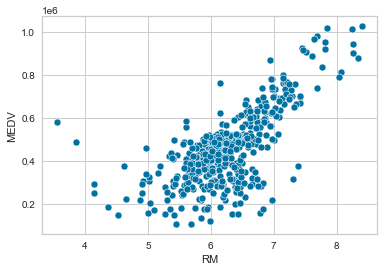

In [8]:
# Gráfico de dispersão entre as variáveis 'RM' e 'MEDV'
sns.scatterplot(data=houses, x='RM', y='MEDV');

Como os dados já estão tratados, partiremos para o modelo de regressão linear

In [9]:
# Definindo as variáveis X e y
X = houses.iloc[:, 0].values
y = houses.iloc[:, 3].values
X

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [10]:
# Precisamos formatar uma matriz com uma coluna a mais
X = X.reshape(-1, 1)

In [11]:
# Ajustar um modelo linear
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [12]:
# Visualizando os coeficientes
print(modelo.intercept_, modelo.coef_)

-663283.9105825216 [179098.59189784]


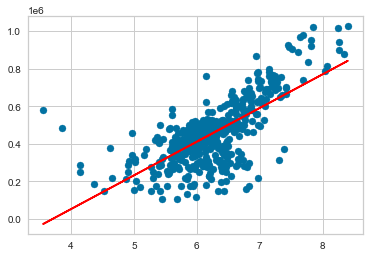

In [13]:
# Gerando o gráfico com pontos reais e a previsão
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color='red');

In [14]:
# Prevendo valor 
modelo.predict([[22]])

array([3276885.11116998])

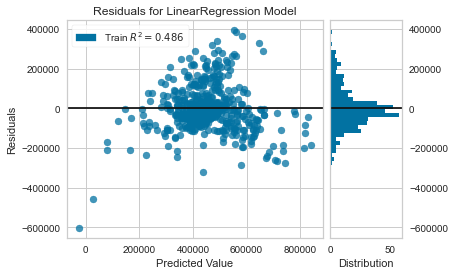

In [15]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X,y)
visualizador.poof();

##### O gráfico de residuais é bom para verificar se o modelo escolhido é bom.
##### Para ser bom, a distribuição tem que ser normal e também tem que ter muitos dados ao redor da linha de ajuste, o que acontece no gráfico acima.